# Systems with multiple states

The models in previous lectures assumed that when the model fails then it stays failed. Now we look at models in which the system can be replaced or repaired.

We assume that:

- The system is in one of its possible states, e.g. woringor failed.
- The probability of future state depends only on current state. Not on the states before. This is called _Markov property_. The model is _Markov model_.
- The probability of future state given current state does not change with time. This model is _stationary_.

Notation:

- The states of the model are indexed by $i=1 \dots n$.
- The probability that the state of the model changes from $i$ to $j$ is denoted $p_{ij}$.
- Probability that the state $i$ does not change is therefore $p_{ii}$.

The model (or process) is characterized by constant square _transition matrix_ $\mathbf{P}$
\begin{align}
\mathbf{P} &=\left[p_{ij}\right] =
\begin{bmatrix} 
p_{11} & p_{12} & \dots  & p_{1n} \\
p_{21} & p_{22} & \dots  & p_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
p_{n1} & p_{n2} & \dots  & p_{nn}
\end{bmatrix}
\end{align}

It holds
$$
\sum_{j=1}^{n} p_{ij} = 1 \text{ for } i=1\dots n
$$

We also assume that the probability that the state $i$ changes to state $j$ during time $\Delta t$ can be expressed using transition rate $\lambda_{ij}$
\begin{align}
p_{ij} = \lambda_{ij} \Delta t
\end{align}

## System with two states
In the simplest case the system has two states

- State 1 - system is working
- State 2 - system is not working

Contrary to models presented in previous lectures, the model can translate from "not working" to "working".

<img src="./tes07-01.png" title="Markov model with two states" style="width: 350px" align="center"/>


Transition matrix
\begin{align}
\mathbf{P} &=
\begin{bmatrix} 
p_{11} & p_{12} \\
p_{21} & p_{22}
\end{bmatrix}
=
\begin{bmatrix} 
(1-\lambda)\Delta t & \lambda \Delta t \\
\mu \Delta t & (1-\mu)\Delta t \\
\end{bmatrix}
\end{align}

Now recall the law of total probability
$$\Pr(A)=\sum_{i=1}^n\Pr(A\mid B_i)\Pr(B_i)$$

and use it to write the probability that the system is working at $t + \Delta t$
\begin{align}
\Pr(\overline{A}_{t+\Delta t}) &= \Pr(\overline{A}_{t+\Delta t}\mid \overline{A}_{t})\Pr(\overline{A}_{t}) + \Pr(\overline{A}_{t+\Delta t}\mid A_{t})\Pr(A_{t})
\end{align}

and that the system is not working at $t + \Delta t$
\begin{align}
\Pr(A_{t+\Delta t}) &= \Pr(A_{t+\Delta t}\mid \overline{A}_{t})\Pr(\overline{A}_{t}) + \Pr(A_{t+\Delta t}\mid A_{t})\Pr(A_{t})
\end{align}

We denote the probability that the system is in state $i$ at time $t$ as $P_{i}(t)$. The above two equations are written as
\begin{align}
P_1(t+\Delta t) &= (1-\lambda \Delta t)P_1(t) + \mu \Delta t P_2(t)\\
P_2(t+\Delta t) &= \lambda \Delta tP_1(t) + (1 - \mu \Delta t) P_2(t)\\
\end{align}

Manipulating these equations we write

\begin{align}
\frac{P_1(t+\Delta t)-P_1(t)}{\Delta t} &= -\lambda P_1(t) + \mu P_2(t)\\
\frac{P_2(t+\Delta t)-P_2(t)}{\Delta t} &= \lambda P_1(t) - \mu P_2(t)
\end{align}

For $\Delta t \rightarrow 0$ we get

\begin{align}
\frac{dP_1(t)}{dt} &= -\lambda P_1(t) + \mu P_2(t)\\
\frac{dP_2(t)}{dt} &= \lambda P_1(t) - \mu P_2(t)
\end{align}

In matrix form we get
$$
\begin{bmatrix} 
\frac{dP_1(t)}{dt} \\
\frac{dP_2(t)}{dt}
\end{bmatrix}
=
\begin{bmatrix} 
-\lambda & \mu \\
\lambda & -\mu
\end{bmatrix}
\begin{bmatrix} 
P_1(t) \\
P_2(t)
\end{bmatrix}
=
Q^T
\begin{bmatrix} 
P_1(t) \\
P_2(t)
\end{bmatrix}
$$

This is a system of two ordinary differential equations. The ODEs are dependent - we see that $\frac{dP_1(t)}{dt} = -\frac{dP_2(t)}{dt}$. So we regularize the system by requiring
$$
P_1(t)+P_2(t) = 1
$$

Using this requirement with first of the ODEs we get
$$
\frac{dP_1(t)}{dt} = -(\lambda+\mu) P_1(t) + \mu
$$

which has the solution
$$
P_1(t) = \frac{\mu}{\lambda + \mu} + C_1 \exp(-(\lambda + \mu)t)
$$

Assuming initial condition $P_1(0) = 1$, i.e. system works at the begining of time, we get
$$
C_1 = \frac{\lambda}{\lambda + \mu}
$$

And the solution is
\begin{align}
P_1(t) &= \frac{\mu}{\lambda+\mu} + \frac{\lambda}{\lambda+\mu}\exp(-(\lambda+\mu)t)\\
P_2(t) &= \frac{\lambda}{\lambda+\mu} - \frac{\lambda}{\lambda+\mu}\exp(-(\lambda+\mu)t)\\
\end{align}

This sytem may also start as not working. As an exercise, solve the ODEs for initial condition $P_1(0) = 0$.

In [16]:
import numpy as np
import scipy as sp
import scipy.integrate
import matplotlib.pyplot as plt

# IPython's magic function.
# Sets the backend of matplotlib to the 'inline' backend.
%matplotlib inline

# My example: system with one reserve

# States
states =\
    ['working',
     'not working']

# Rate of failure
lmbda = 0.01 # Using "lmbda" instead of "lambda" which is Python's reserved word.
# Rate of repair
mu = 0.02

# Transition rate matrix
Q_matrix = np.array([[-lmbda, lmbda],
                     [mu, -mu]])


# The system of two ODEs of second order was converted into
# system of four ODEs of first order.
def f_vec(y, t):
    dydt = Q_matrix.transpose().dot(y)
    return dydt

dt = 0.1
T = 500.0
t = np.arange(0.0, T, dt)

# Start from "working" state
y0 = np.array([1.0, 0.0])
result = sp.integrate.odeint(f_vec, y0, t)

plt.plot(t, result[:,0])
plt.plot(t, result[:,1])
plt.legend(states)
plt.show()

In [17]:
y0 = np.array([0.0, 1.0])
result = sp.integrate.odeint(f_vec, y0, t)

plt.plot(t, result[:,0])
plt.plot(t, result[:,1])
plt.legend(states)
plt.show()

## System with backup
Four states

- working with backup - state 1
- not working with backup - state 2
- working with no backup - state 3 
- not working with no backup - state 4

<img src="./tes07-02.png" title="Markov model with two states" style="width: 200px" align="center"/>

- Rate of failure $\lambda$
- Rate of repair $\kappa$
- Rate of replacement $\mu$



In [19]:
import numpy as np
import scipy as sp
import scipy.integrate
import matplotlib.pyplot as plt

# IPython's magic function.
# Sets the backend of matplotlib to the 'inline' backend.
%matplotlib inline

# My example: system with one reserve

# States
states =\
    ['working with backup',
     'not working with backup',
     'working with no backup',
     'not working with no backup']

# Rate of failure
lmbda = 0.01 # Using "lmbda" instead of "lambda" which is Python's reserved word.
# Rate of repair
kappa = 0.02
# Rage of replacement
mu = 0.1

# Transition rate matrix
Q_matrix = np.array([[-lmbda, lmbda, 0, 0],
                     [0, -mu, mu, 0],
                     [kappa, 0, -kappa - lmbda, lmbda],
                     [0, kappa, 0, -kappa]])


# The system of two ODEs of second order was converted into
# system of four ODEs of first order.
def f_vec(y, t):
    dydt = Q_matrix.transpose().dot(y)
    return dydt

dt = 0.1
T = 500.0
t = np.arange(0.0, T, dt)
y0 = np.array([1.0, 0.0, 0.0, 0.0])
result = sp.integrate.odeint(f_vec, y0, t)

plt.plot(t, result[:,0])
plt.plot(t, result[:,1])
plt.plot(t, result[:,2])
plt.plot(t, result[:,3])
plt.legend(states)
plt.show()

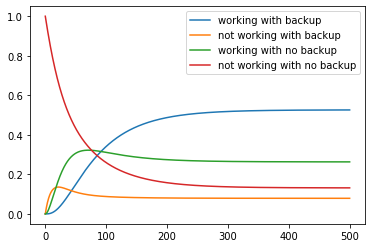

In [20]:
y0 = np.array([0.0, 0.0, 0.0, 1.0])
result = sp.integrate.odeint(f_vec, y0, t)

plt.plot(t, result[:,0])
plt.plot(t, result[:,1])
plt.plot(t, result[:,2])
plt.plot(t, result[:,3])
plt.legend(states)
plt.show()